In [1]:
pip install networkx matplotlib nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Ensure that necessary NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Sample text for processing
text = "Natural language processing enables computers to understand human language. " \
       "This technology is a branch of artificial intelligence that helps computers understand, " \
       "interpret, and respond to human language in a valuable way."

# Tokenize and remove stopwords
tokens = word_tokenize(text.lower())
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\B.N.Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\B.N.Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Imports: The script starts by importing necessary libraries. networkx is used for creating and manipulating graph structures, matplotlib.pyplot for plotting graphs, and nltk for natural language processing tasks.

Tokenization: The text is converted to lowercase and tokenized into words. word_tokenize splits the text into individual words.

Stopwords Removal: Common words (stopwords) that are unlikely to be keywords are removed to focus on more meaningful words.

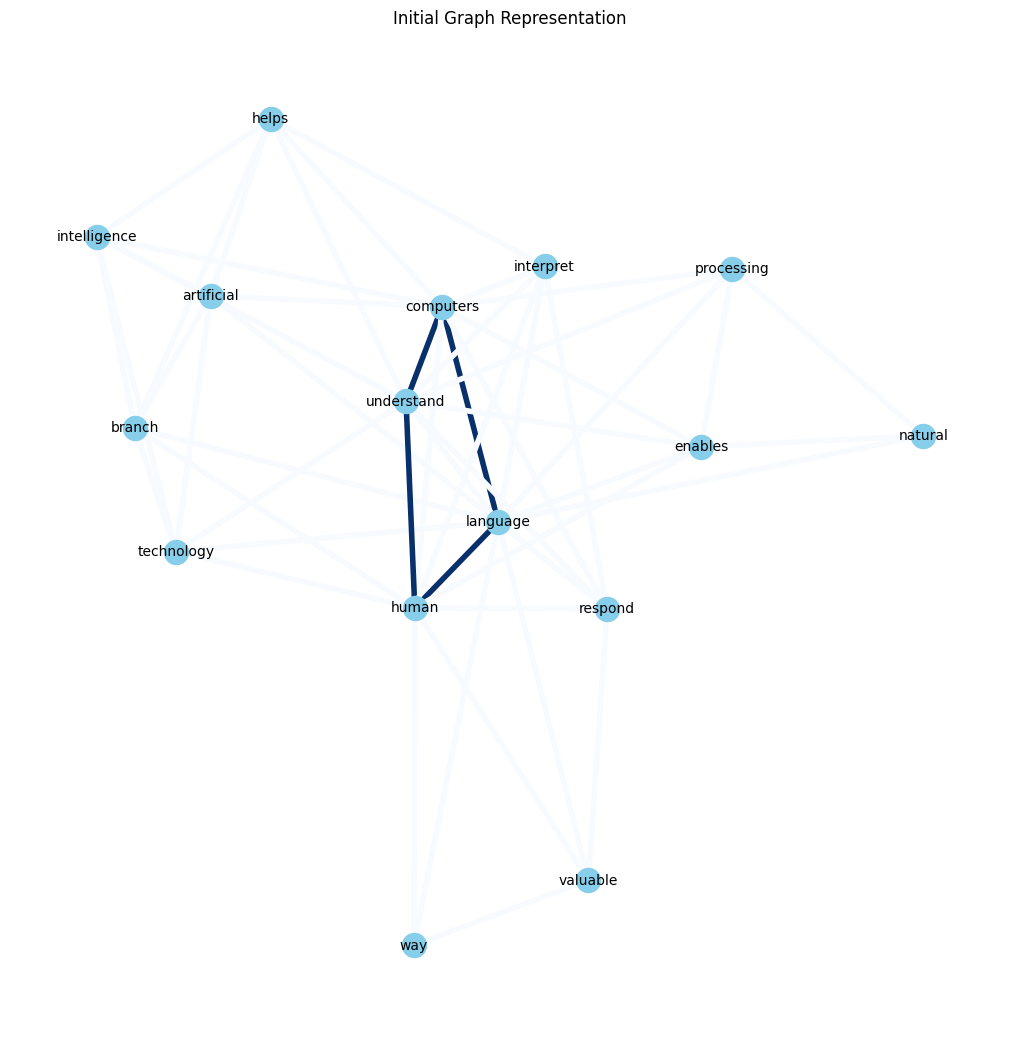

In [3]:
# Create a graph
G = nx.Graph()

# Add nodes and edges based on co-occurrence within a window size of 4
window_size = 4

for i in range(len(filtered_tokens)):
    token = filtered_tokens[i]
    G.add_node(token)  # Add a node for each token
    for j in range(i+1, min(i + window_size, len(filtered_tokens))):
        neighbor = filtered_tokens[j]
        if G.has_edge(token, neighbor):
            G[token][neighbor]['weight'] += 1
        else:
            G.add_edge(token, neighbor, weight=1)

# Draw the initial graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=[G[u][v]['weight'] for u,v in G.edges()],
        width=4, edge_cmap=plt.cm.Blues, font_size=10)
plt.title('Initial Graph Representation')
plt.show()


Graph Creation: A graph is initiated where each unique word in the filtered list becomes a node.

Edge Creation: Edges are added between nodes that co-occur within a specified window size (4 words apart in this example). The weight of an edge increases each time the co-occurrence happens.

Visualization: The graph is visualized using a spring layout which positions nodes in a way that all edges are of more or less equal length and there are as few crossing edges as possible.

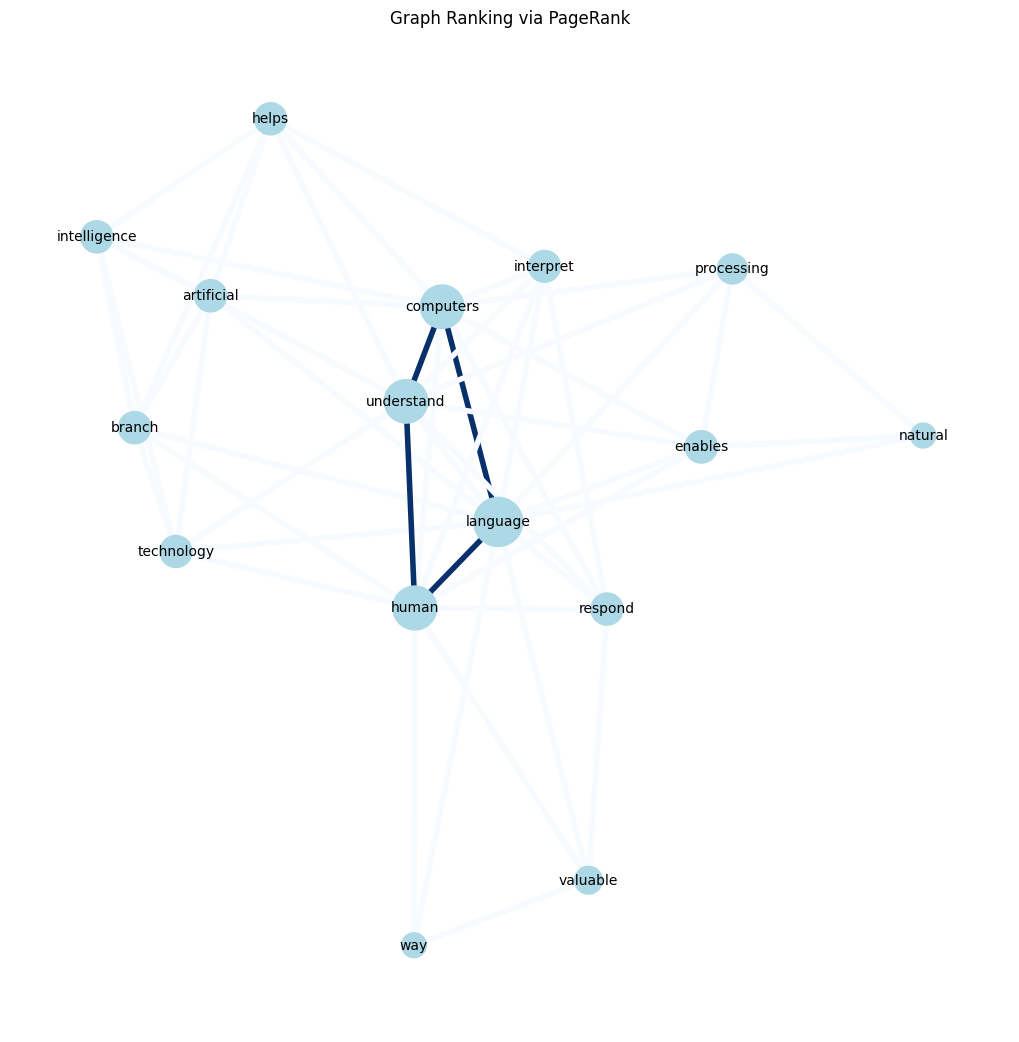

In [4]:
# Compute PageRank
pagerank_scores = nx.pagerank(G, weight='weight')

# Draw graph with node size based on PageRank scores
plt.figure(figsize=(10, 10))
node_size = [pagerank_scores[node] * 10000 for node in G]
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=node_size,
        edge_color=[G[u][v]['weight'] for u,v in G.edges()], width=4, edge_cmap=plt.cm.Blues, font_size=10)
plt.title('Graph Ranking via PageRank')
plt.show()


PageRank Calculation: The PageRank algorithm is applied to the graph. Each node (word) receives a score that estimates its importance within the text based on the graph structure and the weights of the edges.

Visualization: Nodes are plotted with their size proportional to their PageRank score, illustrating the relative importance of each word.

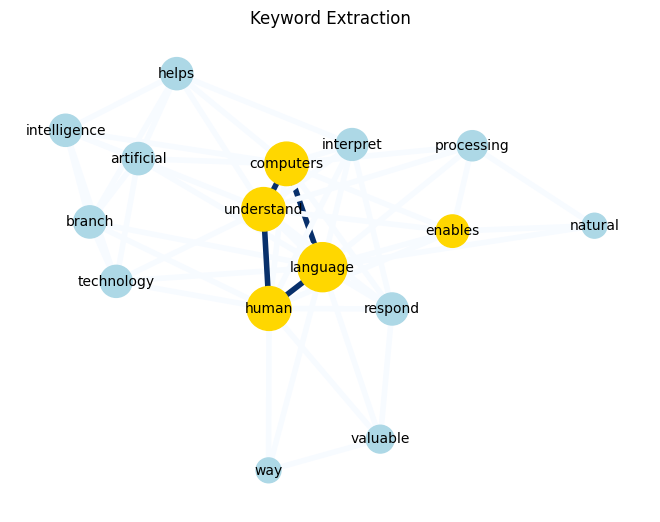

In [5]:
# Highlight top keywords based on PageRank
sorted_nodes = sorted(pagerank_scores, key=pagerank_scores.get, reverse=True)
top_keywords = sorted_nodes[:5]  # Top 5 keywords

highlight = ['gold' if node in top_keywords else 'lightblue' for node in G]
nx.draw(G, pos, with_labels=True, node_color=highlight, node_size=node_size,
        edge_color=[G[u][v]['weight'] for u,v in G.edges()], width=4, edge_cmap=plt.cm.Blues, font_size=10)
plt.title('Keyword Extraction')
plt.show()


Keyword Identification: After computing the PageRank scores, nodes are sorted by their scores. The top 5 nodes (words) are considered the key keywords.

Highlighting Keywords: The graph is redrawn, this time highlighting the top keywords in gold, distinguishing them clearly from other words.